# Part II - (Ford GoBike System Data)
## by (Qasem M Dhamad)

## Investigation Overview


> I wanted to explore at the link between ridesharing time and user gender. I will also consider the time spent on the ridesharing function and the age group of the users. 


## Dataset Overview

> The dataset included in this section is the cleaned up version of the dataset utilized in part One.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe

fordgobike_df = pd.read_csv('fordgobike_df.csv')


In [3]:
fordgobike_df.tail(5)

,Unnamed: 0,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
174875,183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,Beale St at Harrison St,Union Square (Powell St at Post St),4832,Subscriber,1996.0,Male,No,23
174876,183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,Montgomery St BART Station (Market St at 2nd St),3rd St at Townsend St,4960,Subscriber,1984.0,Male,No,35
174877,183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,The Alameda at Bush St,Morrison Ave at Julian St,3824,Subscriber,1990.0,Male,Yes,29
174878,183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,San Pablo Ave at MLK Jr Way,San Pablo Ave at 27th St,5095,Subscriber,1988.0,Male,No,31
174879,183411,271,2019-02-01 00:00:20.636,2019-02-01 00:04:52.058,Spear St at Folsom St,2nd St at Folsom St,1057,Subscriber,1989.0,Male,No,30


### Removing Unnamed columns "Unnamed: 0"

In [4]:
fordgobike_df.drop('Unnamed: 0',inplace=True,axis=1)
fordgobike_df.tail(5)

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
174875,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,Beale St at Harrison St,Union Square (Powell St at Post St),4832,Subscriber,1996.0,Male,No,23
174876,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,Montgomery St BART Station (Market St at 2nd St),3rd St at Townsend St,4960,Subscriber,1984.0,Male,No,35
174877,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,The Alameda at Bush St,Morrison Ave at Julian St,3824,Subscriber,1990.0,Male,Yes,29
174878,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,San Pablo Ave at MLK Jr Way,San Pablo Ave at 27th St,5095,Subscriber,1988.0,Male,No,31
174879,271,2019-02-01 00:00:20.636,2019-02-01 00:04:52.058,Spear St at Folsom St,2nd St at Folsom St,1057,Subscriber,1989.0,Male,No,30


In [5]:
fordgobike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174880 entries, 0 to 174879
Data columns (total 11 columns):
duration_sec               174880 non-null int64
start_time                 174880 non-null object
end_time                   174880 non-null object
start_station_name         174880 non-null object
end_station_name           174880 non-null object
bike_id                    174880 non-null int64
user_type                  174880 non-null object
member_birth_year          174880 non-null float64
member_gender              174880 non-null object
bike_share_for_all_trip    174880 non-null object
member_age                 174880 non-null int64
dtypes: float64(1), int64(3), object(7)
memory usage: 14.7+ MB


In [6]:
fordgobike_df.describe()

,duration_sec,bike_id,member_birth_year,member_age
count,174880.000000,174880.000000,174880.000000,174880.000000
mean,704.022358,4482.549051,1984.837957,34.162043
std,1642.514884,1659.205536,9.974001,9.974001
min,61.000000,11.000000,1920.000000,18.000000
25%,323.000000,3799.000000,1980.000000,27.000000
50%,510.000000,4960.000000,1987.000000,32.000000
75%,789.000000,5505.000000,1992.000000,39.000000
max,84548.000000,6645.000000,2001.000000,99.000000


#### Adding new columns to generate distribution of Rides by Days:

In [7]:

fordgobike_df['start_time'] = pd.to_datetime(fordgobike_df['start_time'])
fordgobike_df['end_time'] = pd.to_datetime(fordgobike_df['end_time'])

fordgobike_df['bike_id'] =fordgobike_df.bike_id.astype(str)


import datetime as dt
fordgobike_df['start_day'] = fordgobike_df['start_time'].dt.day_name()
fordgobike_df['start_month'] = fordgobike_df['start_time'].dt.month_name()


fordgobike_df['start_hr'] = fordgobike_df['start_time'].dt.hour
fordgobike_df['start_hr'] = fordgobike_df.start_hr.astype(str)




fordgobike_df['end_day'] = fordgobike_df['end_time'].dt.day_name()
fordgobike_df['end_month'] = fordgobike_df['end_time'].dt.month_name()
fordgobike_df['end_hr'] = fordgobike_df['end_time'].dt.hour
fordgobike_df['end_hr'] = fordgobike_df.end_hr.astype(str)

In [8]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'start_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                    'end_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                   'start_hr': [str(i) for i in range(0,24)],
                   'end_hr': [str(i) for i in range(0,24)]}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    fordgobike_df[var] = fordgobike_df[var].astype(ordered_var)

## (Visualization 1)

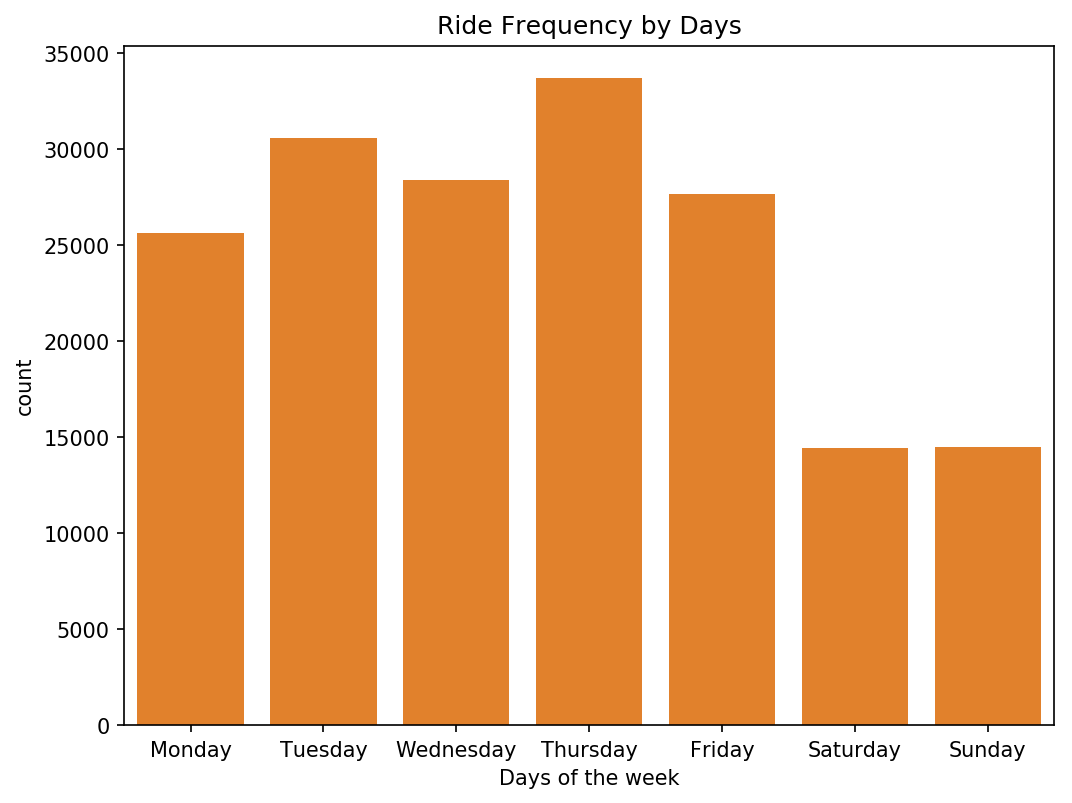

In [11]:
plt.figure(figsize = (8,6),dpi=150)
sns.countplot(data =  fordgobike_df, x = 'start_day', color = sns.color_palette()[1])
plt.xlabel('Days of the week')
plt.title('Ride Frequency by Days');

> Most rides were taken on Thursdays and Tuesdays. while Saturday and Sunday have the lowest trip records.



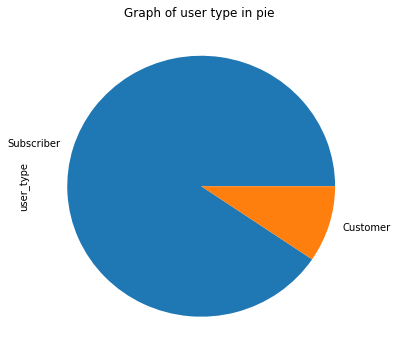

In [12]:
fordgobike_df['user_type'].value_counts().plot(kind='pie', title='Graph of user type in pie ', figsize= (6,6));

> The majority of users are subscribers, and only a few fall into the customer category.

#### User Gender Distribution 

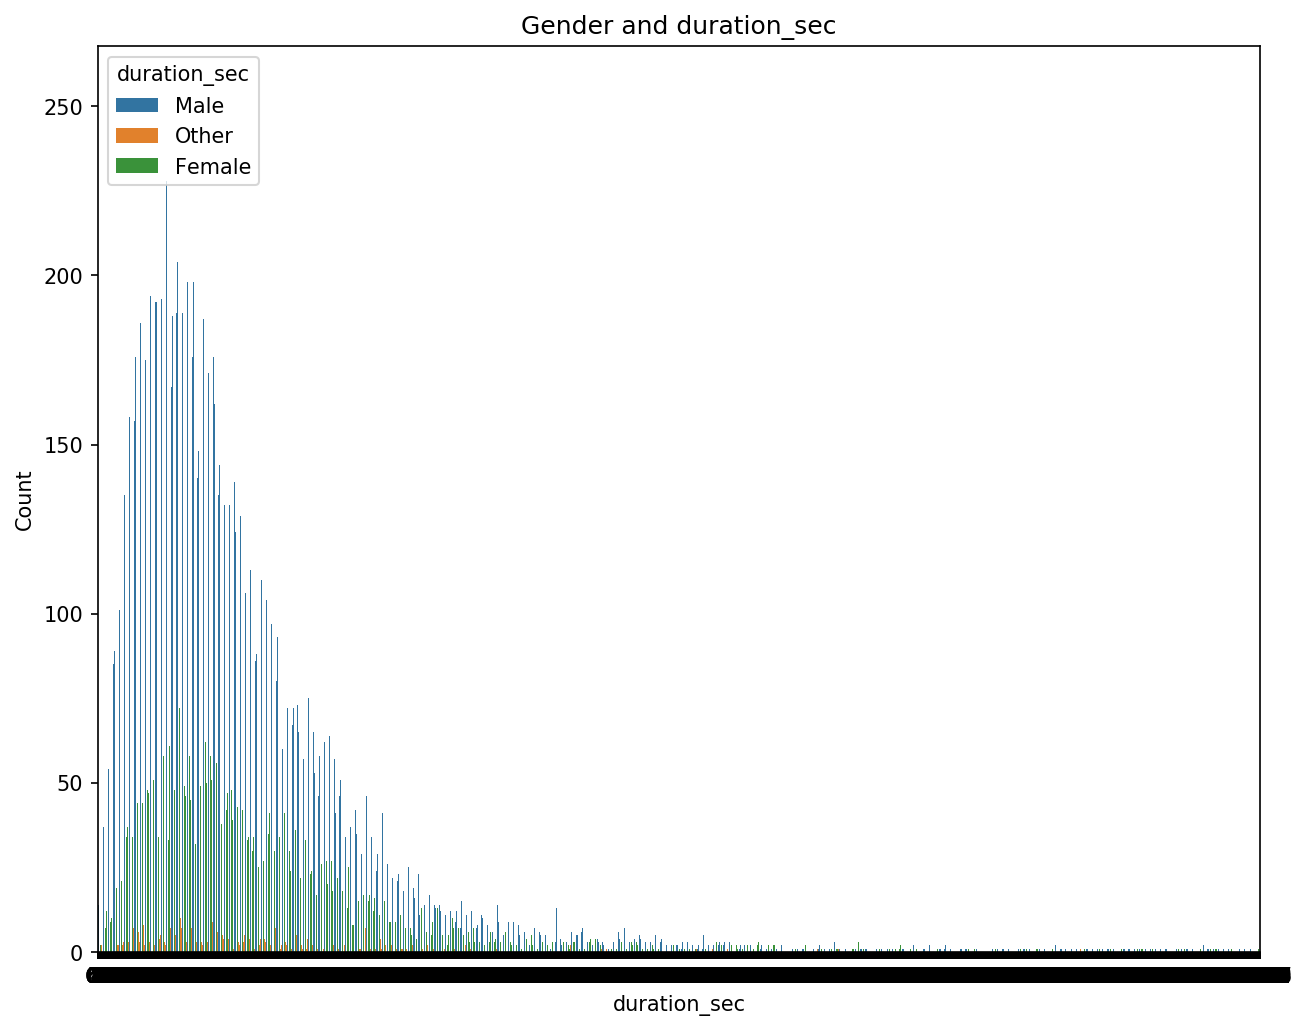

In [13]:
plt.figure(figsize=(10,8),dpi=150)
sns.countplot(data=fordgobike_df,x='duration_sec',hue='member_gender')
plt.xlabel('duration_sec')
plt.ylabel('Count')
plt.legend(title='duration_sec')
plt.title('Gender and duration_sec');

According to the plot, most bike rideshare customers are men, while fewer than half of them are women and a very small number of riders aren't sure of their gender. It also demonstrates that male consumers spend the most time using ride-sharing services!

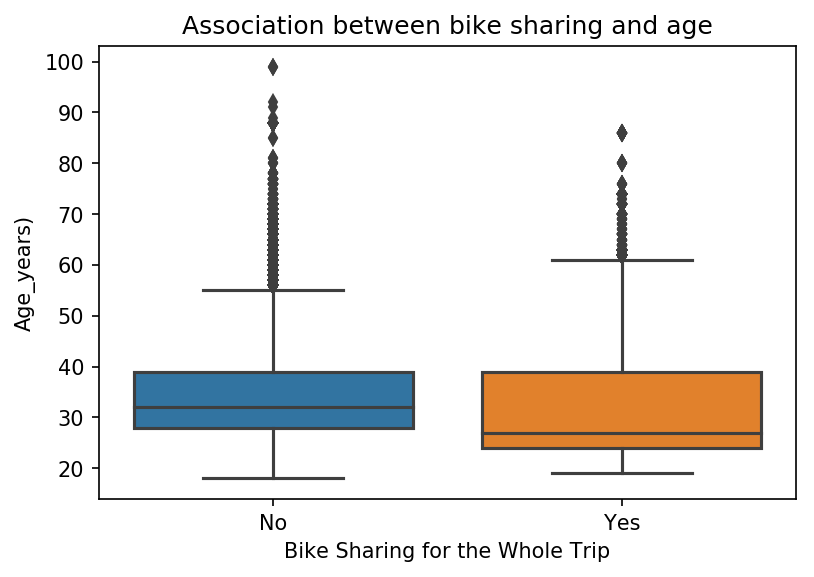

In [15]:
plt.figure(figsize=(6,4),dpi=150)
sns.boxplot(data = fordgobike_df, x = 'bike_share_for_all_trip', y = 'member_age')

plt.xlabel('Bike Sharing for the Whole Trip')
plt.ylabel('Age_years)');
plt.title('Association between bike sharing and age');

> The relationship between member age and the distribution of bikes for all excursions, and the relationship between member age and the distribution of bikes for all excursions.

## (Visualization 2)


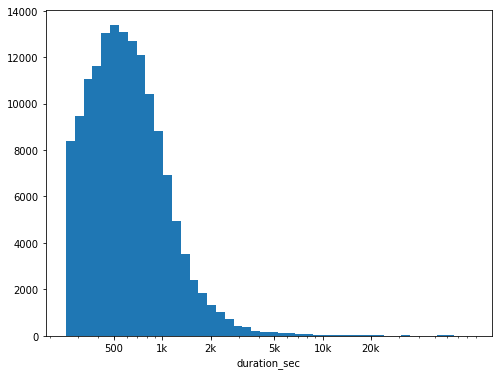

In [16]:
plt.figure(figsize=(8,6),dpi=150)
log_binsize = 0.055
bins = 10 ** np.arange(2.4, np.log10(fordgobike_df['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 6])
plt.hist(data = fordgobike_df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('duration_sec');

> Duration_sec has a long tail distribution when plotted on a logarithmic scale, the distribution appears skewed to the right and peaks between (500 and 1000).

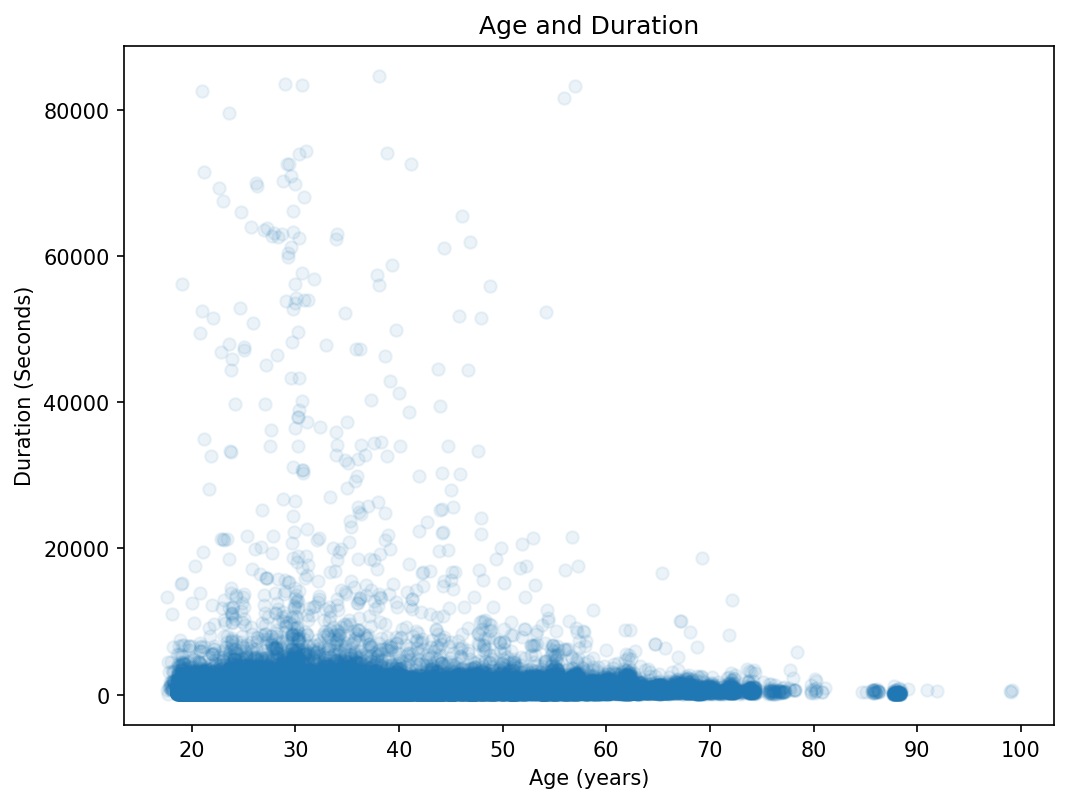

In [18]:
plt.figure(figsize=(8,6),dpi=150)
sns.regplot(data=fordgobike_df,x='member_age',y='duration_sec',fit_reg=False, x_jitter=0.4, scatter_kws={'alpha':1/12})
plt.xlabel('Age (years)')
plt.ylabel('Duration (Seconds)')
plt.title('Age and Duration');

> There is a weak negative relationship between duration and age. The older the user, the shorter the travel time.

## (Visualization 3)



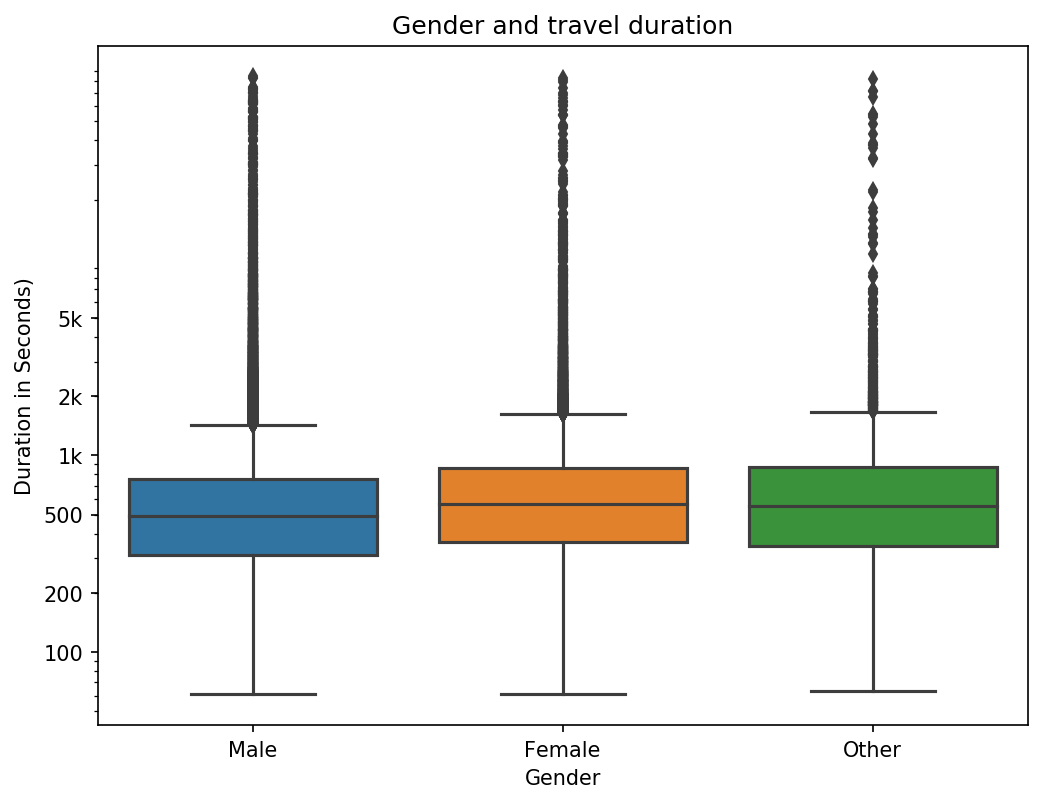

In [19]:
plt.figure(figsize=(8,6),dpi=150)
sns.boxplot(data=fordgobike_df,x='member_gender',y='duration_sec',order=['Male','Female','Other'])
plt.yscale('log')
y_ticklocs=[100,200,500,1e3,2e3,5e3]
y_ticklabels=['100','200','500','1k','2k','5k']
plt.yticks(y_ticklocs,y_ticklabels)
plt.xlabel('Gender')
plt.ylabel('Duration in Seconds)')
plt.title('Gender and travel duration');

> The above box plot shows that males have shorter trips than other genders.

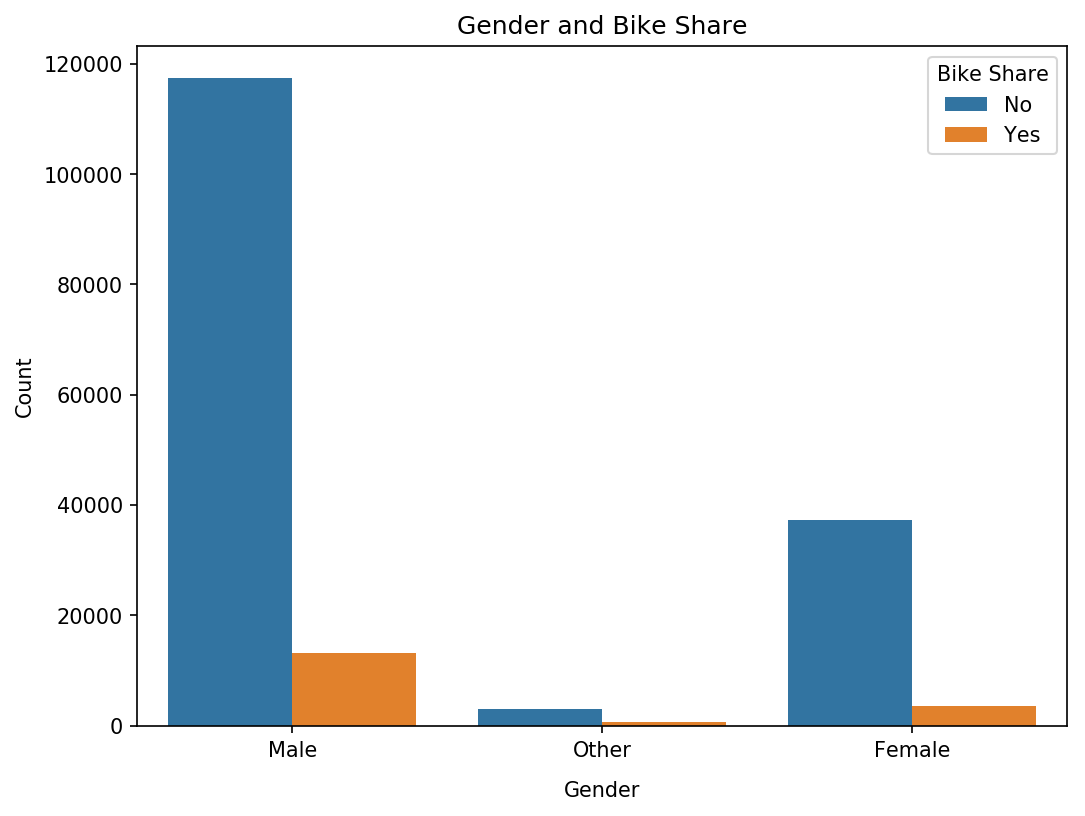

In [20]:
plt.figure(figsize=(8,6),dpi=150)
sns.countplot(data=fordgobike_df,x='member_gender',hue='bike_share_for_all_trip')
plt.xlabel('Gender',labelpad=10)
plt.ylabel('Count')
plt.legend(title='Bike Share')
plt.title('Gender and Bike Share');

> There's no apparent relationship between gender and sharing the bike.

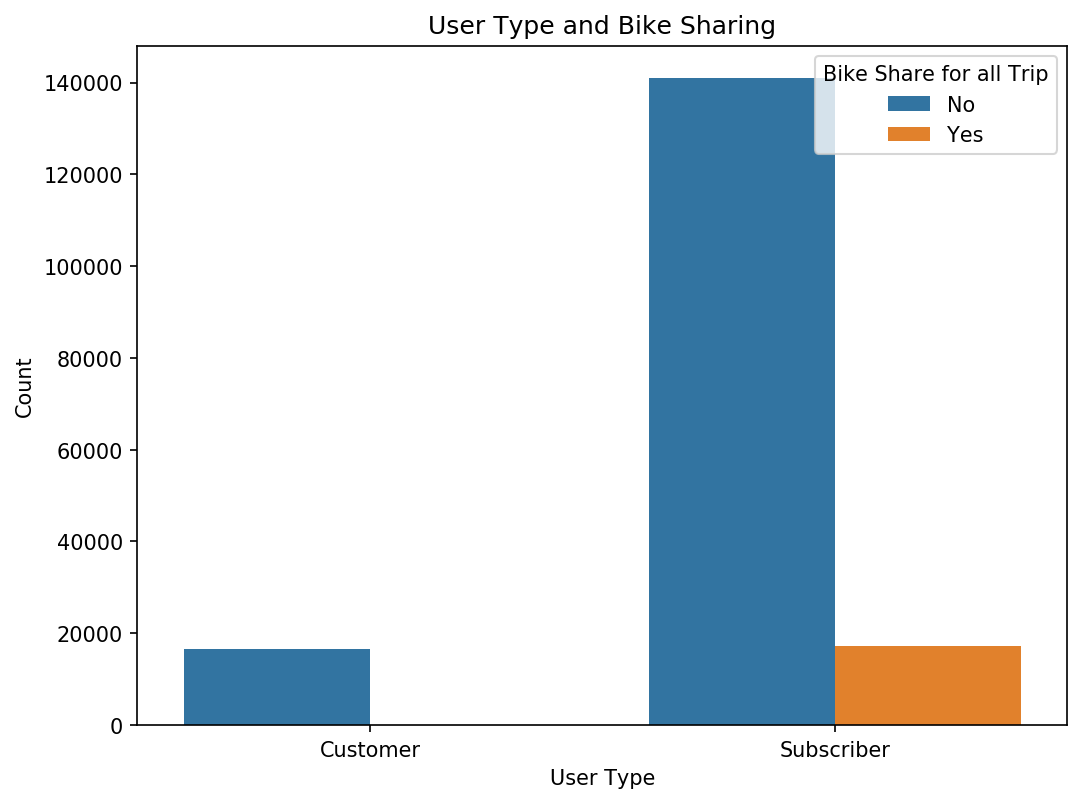

In [21]:
plt.figure(figsize=(8,6),dpi=150)
sns.countplot(data=fordgobike_df,x='user_type',hue='bike_share_for_all_trip')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.legend(title='Bike Share for all Trip')
plt.title('User Type and Bike Sharing');

> Bike sharing happens only by subscribers, which is very intuitive.

In [ ]:
plt.figure(figsize=(10,8),dpi=150)
g=sns.FacetGrid(data=fordgobike_df,col='user_type_Subscriber',aspect=2)
g.map(sns.regplot,data=fordgobike_df, x='age',y='duration_sec',fit_reg=False, x_jitter=0.4, scatter_kws={'alpha':1/10})
g.set_titles('{col_name}')
g.set_axis_labels('Age in Years)','Duration (Seconds)')
plt.suptitle('Age, Duration and User Type')

> User type does not affect the relationship between age and duration.

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [23]:
# Use this command if you are running this file in local
!jupyter nbconvert <Part_II_Ford GoBike System Data>.ipynb --to slides --post serve --no-input --no-prompt

/bin/sh: 1: cannot open Part_II_Ford: No such file


> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
